In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.layers import Input, Conv2D
from tensorflow.keras.layers import MaxPool2D, Flatten, Dense
from tensorflow.keras import Model

In [16]:
lbl = np.load('labels.npy', allow_pickle=True)
fld = np.load('images.npy', allow_pickle=True)

In [9]:
names, indices = np.unique(lbl[0], return_index=True)
names = names[:8]
indices = indices[:8]

In [10]:
fld[0].shape

(439, 128, 128)

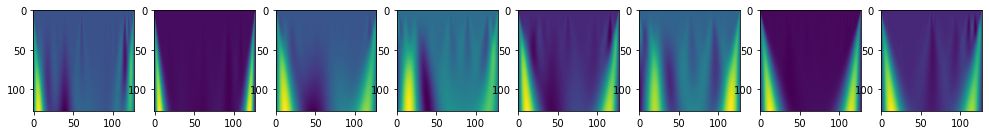

In [72]:
fig, ax = plt.subplots(1, len(names), figsize=(17, 11))
for i in range(len(names)):
    ax[i].imshow(fld[i][indices[i]])

In [99]:
lbl[0][np.where(lbl[0] == names[0])][i]

'Actinolite'

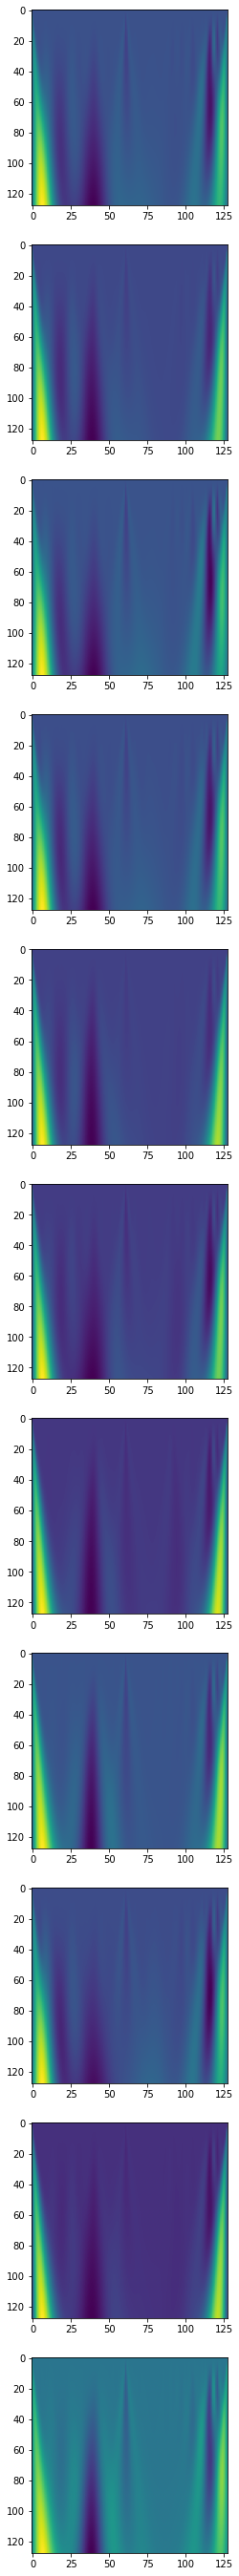

In [103]:
fig, ax = plt.subplots(len(lbl[0][np.where(lbl[0] == names[0])]), figsize=(17, 49))
for i in range(len(lbl[0][np.where(lbl[0] == names[0])])):
    ax[i].imshow(fld[0][np.where(lbl[0] == names[0])][i])

In [17]:
lbl = lbl[:8]
fld = fld[:8]

In [55]:
# import necessary layers  VGG16
from tensorflow.keras.layers import Input, Conv2D 
from tensorflow.keras.layers import MaxPool2D, Flatten, Dense 
from tensorflow.keras import Model
# input

input = Input(shape =(128,128, 1))
# 1st Conv Block

x = Conv2D (filters =64, kernel_size =3, padding ='same', activation='relu')(input)
x = Conv2D (filters =64, kernel_size =3, padding ='same', activation='relu')(x)
x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)
# 2nd Conv Block

x = Conv2D (filters =128, kernel_size =3, padding ='same', activation='relu')(x)
x = Conv2D (filters =128, kernel_size =3, padding ='same', activation='relu')(x)
x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)
# 3rd Conv block

x = Conv2D (filters =256, kernel_size =3, padding ='same', activation='relu')(x)
x = Conv2D (filters =256, kernel_size =3, padding ='same', activation='relu')(x)
x = Conv2D (filters =256, kernel_size =3, padding ='same', activation='relu')(x)
x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)
# 4th Conv block

x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)

# 5th Conv block

x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)
# Fully connected layers

x = Flatten()(x)
x = Dense(units = 4096, activation ='relu')(x)
x = Dense(units = 4096, activation ='relu')(x)
output = Dense(units = 1000, activation ='softmax')(x)
# creating the model

model = Model (inputs=input, outputs =output)
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 1)]     0         
                                                                 
 conv2d_31 (Conv2D)          (None, 128, 128, 64)      640       
                                                                 
 conv2d_32 (Conv2D)          (None, 128, 128, 64)      36928     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 64, 64, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_33 (Conv2D)          (None, 64, 64, 128)       73856     
                                                                 
 conv2d_34 (Conv2D)          (None, 64, 64, 128)       147584    
                                                             

In [56]:
ths = {}

In [57]:
X = np.vstack(fld)
y = np.concatenate(lbl)

In [58]:
print(X.shape, X.dtype, X.min(), X.max())
print(y.shape, y.dtype)

(3368, 128, 128) float64 -7.528248931196204 9.340700343404055
(3368,) object


In [59]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

le.fit(y)

yl = le.transform(y)

In [60]:
X = np.expand_dims(X, 3)#.shape

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, yl, test_size=0.2, stratify=y, random_state=0)
# print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
# print(np.unique(y_train, return_counts=True)[1]/len(y_train))
# print(np.unique(y_test, return_counts=True)[1]/len(y_test))

In [42]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(128, 128, 1)),
    tf.keras.layers.Conv2D(16, kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(16, kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2),strides=2),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(3, 3),strides=2),
    tf.keras.layers.Dropout(.3),
    tf.keras.layers.Conv2D(96, kernel_size=(5, 5), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2),strides=2),
    tf.keras.layers.Dropout(.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(.75),
    tf.keras.layers.Dense(10)
])

# summary of entire model
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 128, 128, 16)      160       
                                                                 
 conv2d_25 (Conv2D)          (None, 128, 128, 16)      2320      
                                                                 
 conv2d_26 (Conv2D)          (None, 128, 128, 16)      2320      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 64, 64, 16)       0         
 g2D)                                                            
                                                                 
 dropout_16 (Dropout)        (None, 64, 64, 16)        0         
                                                                 
 conv2d_27 (Conv2D)          (None, 62, 62, 64)        9280      
                                                      

In [52]:
np.unique(y).shape

(212,)

In [64]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 1)]     0         
                                                                 
 conv2d_31 (Conv2D)          (None, 128, 128, 64)      640       
                                                                 
 conv2d_32 (Conv2D)          (None, 128, 128, 64)      36928     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 64, 64, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_33 (Conv2D)          (None, 64, 64, 128)       73856     
                                                                 
 conv2d_34 (Conv2D)          (None, 64, 64, 128)       147584    
                                                             

In [65]:
%%time
model.add(Dense(212, activation='softmax'))

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))
ths['3xCCPD'] = history

AttributeError: 'Functional' object has no attribute 'add'

In [ ]:
fig, ax = plt.subplots()
ax.plot(history.history['loss'], label='loss')
ax.plot(history.history['val_loss'], label='val_loss')
ax.set_xlabel('epoch')
ax.set_ylabel('cross-entropy')
ax.legend()
ax.grid()

In [ ]:
model.evaluate(X_test, y_test, verbose=2)